# FashionMnist 데이터셋으로 다양체 학습하기

https://www.kaggle.com/zalando-research/fashionmnist?select=train-labels-idx1-ubyte

Context
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


TL;DR

Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)
Acknowledgements
Original dataset was downloaded from https://github.com/zalandoresearch/fashion-mnist

Dataset was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv/

License
The MIT License (MIT) Copyright © [2017] Zalando SE, https://tech.zalando.com

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn import manifold
from sklearn import random_projection
from sklearn import datasets

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
mnist_train = pd.read_csv('/content/drive/My Drive/kaggle/Fashion_Mnist/fashion-mnist_train.csv')
mnist_test = pd.read_csv('/content/drive/My Drive/kaggle/Fashion_Mnist/fashion-mnist_test.csv')

In [ ]:
print(type(mnist_train))
mnist_train.head()

<class 'pandas.core.frame.DataFrame'>


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(type(mnist_test))
mnist_test.head()

<class 'pandas.core.frame.DataFrame'>


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


- 다양체 학습 결과를 위해 train dataset 으로 100개 사용

In [ ]:
mnist_X_train = mnist_train.loc[0:100,'pixel1':'pixel784']
mnist_X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,227,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,136,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,0,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98,0,0,1,0,1,0,0,0,0,50,84,127,155,106,126,169,207,60,71,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,184,174,106,142,...,161,212,160,203,165,189,0,0,0,0,0,0,0,0,0,0,0,0,166,151,142,176,89,212,210,127,137,119,195,171,138,159,142,71,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,0,144,0,0,0,156,81,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,199,...,255,245,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,113,162,212,206,185,144,100,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist_y_train = mnist_train.loc[0:100,'label']
mnist_y_train

0      2
1      9
2      6
3      0
4      3
      ..
96     5
97     8
98     4
99     3
100    8
Name: label, Length: 101, dtype: int64

## 시각화 함수 선언

In [ ]:
s_curve, color = datasets.make_s_curve(1000, random_state=0)

In [ ]:
mnist, labels = mnist_X_train, mnist_y_train
rand_proj = random_projection.SparseRandomProjection(n_components=3, random_state=0)
projected_mnist = rand_proj.fit_transform(mnist)

In [ ]:
def min_max_scale(x):
  min_value, max_value = np.min(x, 0), np.max(x, 0)
  x = (x - min_value) / (max_value - min_value)
  return x

In [ ]:
def plot_s_curve(s_curve, color, position, projection):
  s_curve = min_max_scale(s_curve)
  if projection == '3d':
    ax = plt.subplot(position, projection=projection)
    ax.scatter(s_curve[:, 0], s_curve[:, 1], s_curve[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.view_init(4, -72)
  elif projection == '2d':
    ax = plt.subplot(position)
    ax.scatter(s_curve[:, 0], s_curve[:, 1], c=color, cmap=plt.cm.Spectral)
    

In [ ]:
def plot_mnist(mnist, labels, position, projection):
  mnist = min_max_scale(mnist)
  if projection == '3d':
    ax = plt.subplot(position, projection=projection)
    for i in range(mnist.shape[0]):
      ax.text(mnist[i, 0], mnist[i, 1], mnist[i, 2], str(labels[i]), 
              color=plt.cm.Set1(labels[i]/10.), fontdict={'weight':'bold', 'size':9})
    ax.view_init(4, -72)
  elif projection == '2d':
    ax = plt.subplot(position)
    for i in range(mnist.shape[0]):
      ax.text(mnist[i, 0], mnist[i, 1], str(labels[i]), 
              color=plt.cm.Set1(labels[i]/10.), fontdict={'weight':'bold', 'size':9})


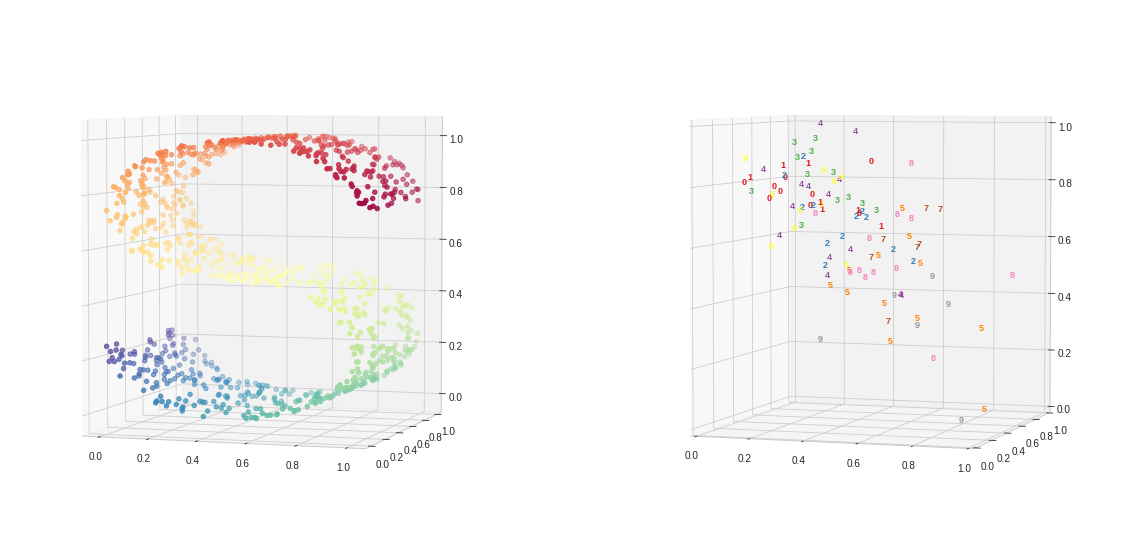

In [ ]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve, color, 121, '3d')
plot_mnist(projected_mnist, labels, 122, '3d')

## Locally Linear Embedding (LLE)

* 국소 이웃 거리를 보존하는 저차원 임베딩을 찾음

In [ ]:
s_curve_lle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, method='standard', random_state=0).fit_transform(s_curve)
mnist_lle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3, method='standard', random_state=0).fit_transform(mnist)

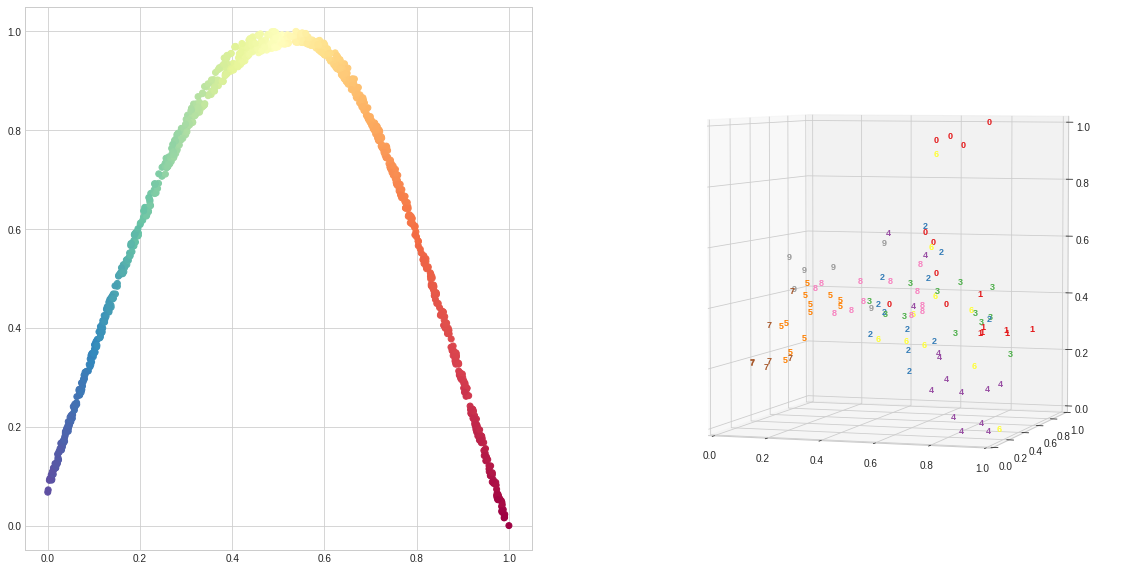

In [ ]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_lle, color, 121, '2d')
plot_mnist(mnist_lle, labels, 122, '3d')

## Local Tangent Space Alignment (LTSA)

* 탄젠트 공간을 통해 각 이웃의 국소 성질을 특성화
* 국소 탄젠트 공간을 정렬

In [ ]:
s_curve_ltsa = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, method='ltsa', random_state=0).fit_transform(s_curve)
mnist_ltsa = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3, method='ltsa', random_state=0).fit_transform(mnist)

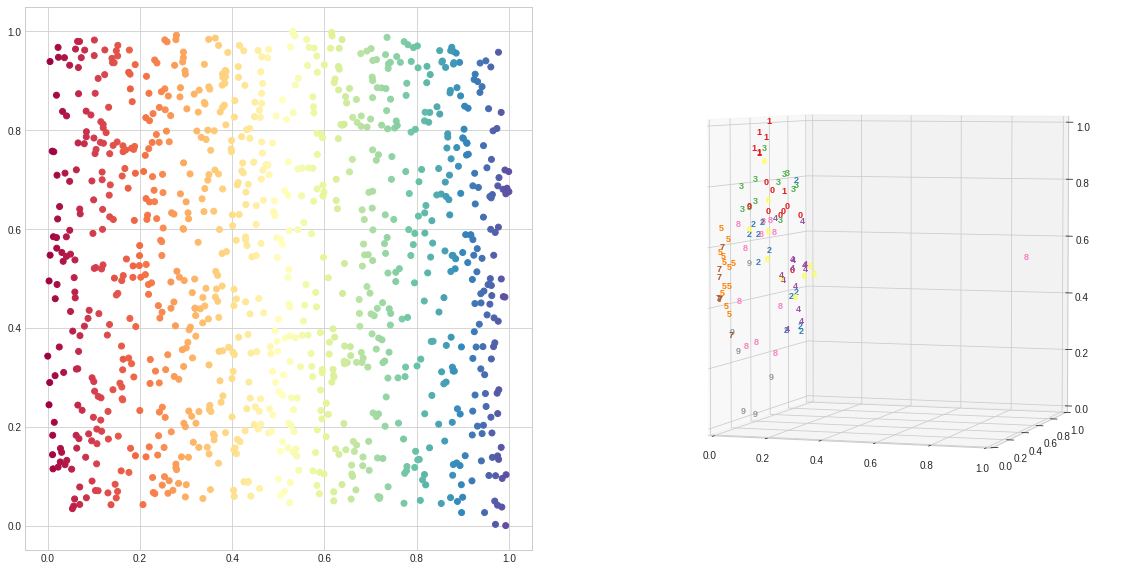

In [ ]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_ltsa, color, 121, '2d')
plot_mnist(mnist_ltsa, labels, 122, '3d')

## Hessian Eigenmapping

* LLE의 문제를 해결한 다른 방법
* 국소 선형 구조를 복원하기 위해 각 이웃에서 hessian 기반의 이차 형태를 중심으로 회전

In [ ]:
s_curve_hlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, method='hessian', random_state=0).fit_transform(s_curve)
mnist_hlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3, method='hessian', random_state=0).fit_transform(mnist)

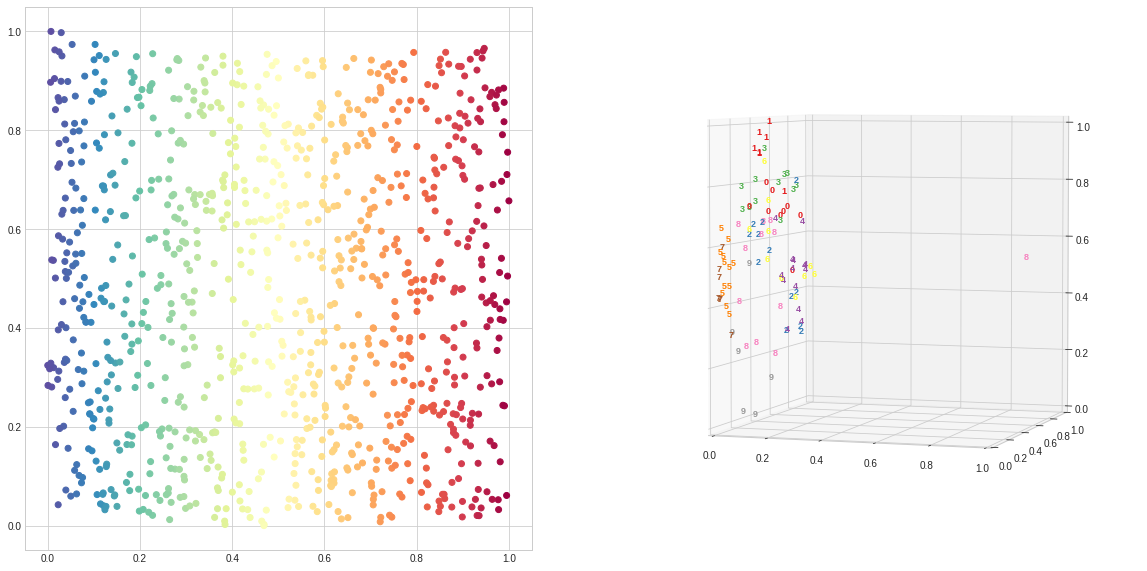

In [ ]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_hlle, color, 121, '2d')
plot_mnist(mnist_hlle, labels, 122, '3d')

## Modified Locally Linear Embedding

* 각 이웃에 여러 가중치 벡터를 사용
* n_neighbors > n_components를 만족해야 함

In [ ]:
s_curve_mlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, method='modified', random_state=0).fit_transform(s_curve)
mnist_mlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3, method='modified', random_state=0).fit_transform(mnist)

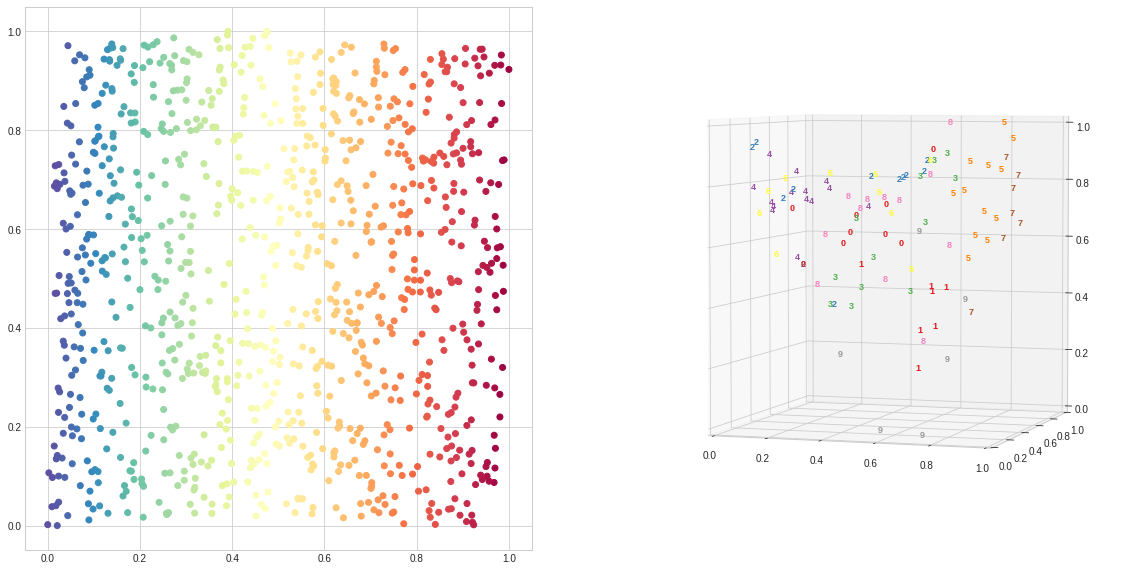

In [ ]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_mlle, color, 121, '2d')
plot_mnist(mnist_mlle, labels, 122, '3d')

## Isomap

* 초기의 다양체 학습 알고리즘
* MDS와 커널 PCA의 확장으로 볼 수 있음
* 모든 점들 사이의 측지 거리를 유지하는 저차원 임베딩을 찾음

In [ ]:
s_curve_isomap = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(s_curve)
mnist_isomap = manifold.Isomap(n_neighbors=30, n_components=3).fit_transform(mnist)

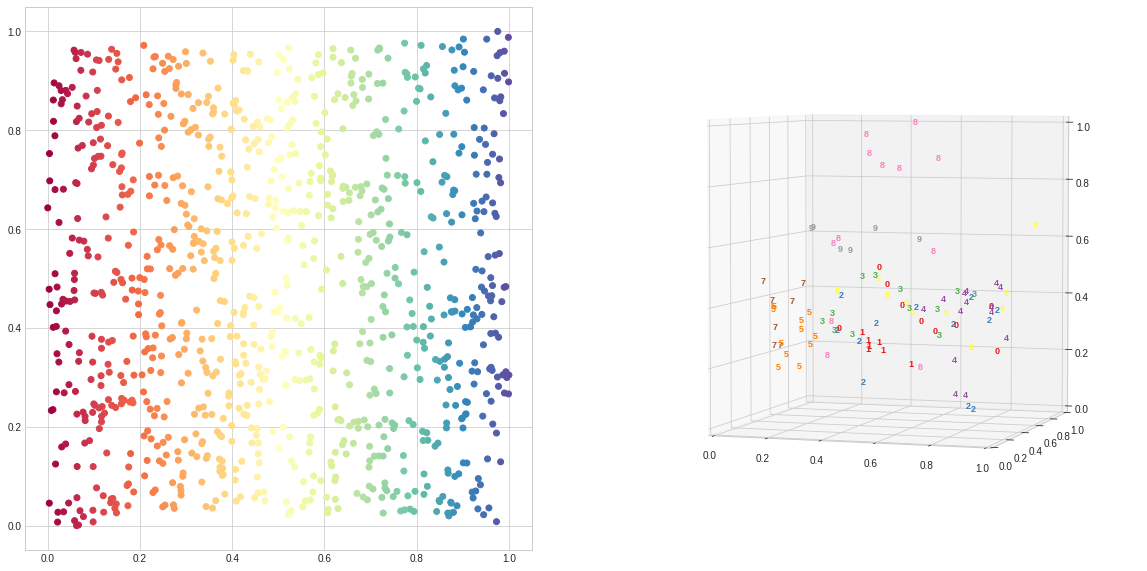

In [ ]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_isomap, color, 121, '2d')
plot_mnist(mnist_isomap, labels, 122, '3d')

## Multi-Dimensional Scaling (MDS)

* 고차원 공간에서의 거리를 고려하는 저차원 공간을 찾음

In [ ]:
s_curve_mds = manifold.MDS(n_components=2, random_state=0).fit_transform(s_curve)
mnist_mds = manifold.MDS(n_components=3, random_state=0).fit_transform(mnist)

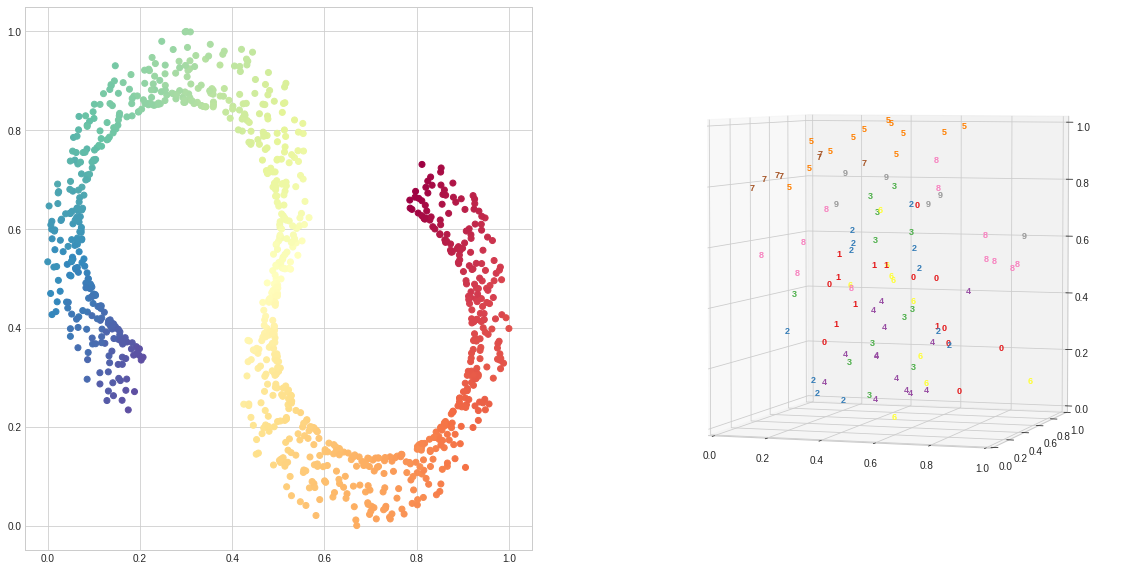

In [ ]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_mds, color, 121, '2d')
plot_mnist(mnist_mds, labels, 122, '3d')

## Spectral Embedding

* 스펙트럼 분해를 통해 데이터의 저차원 표현을 찾음
* 데이터의 점이 저차원 공간에서도 서로 가깝게 유지되도록 함

In [ ]:
s_curve_se = manifold.SpectralEmbedding(n_components=2, random_state=0).fit_transform(s_curve)
mnist_se = manifold.SpectralEmbedding(n_components=3, random_state=0).fit_transform(mnist)

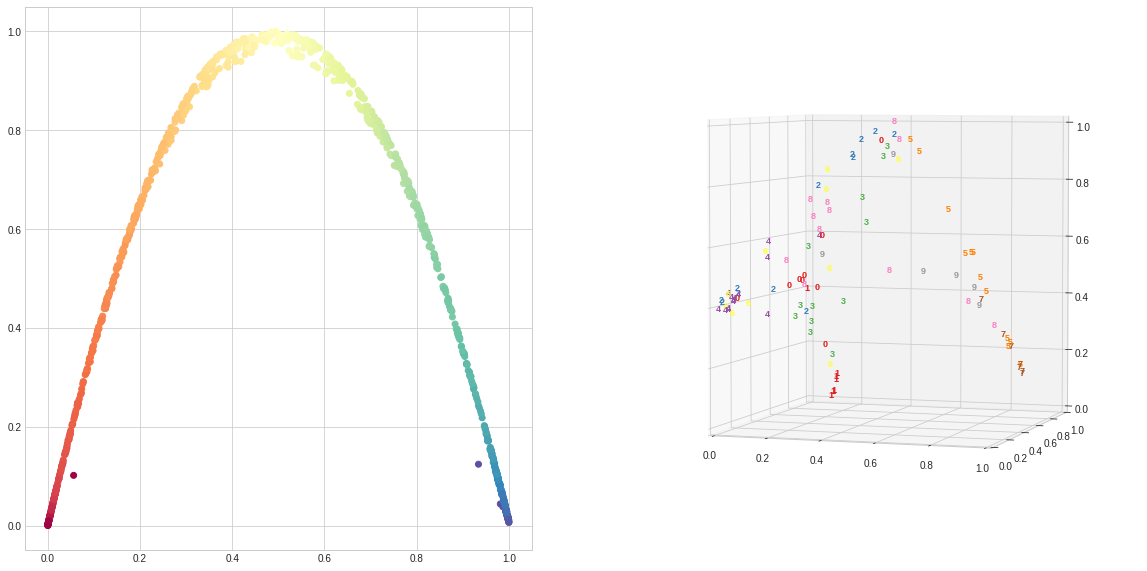

In [ ]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_se, color, 121, '2d')
plot_mnist(mnist_se, labels, 122, '3d')

## t-distributed Stochastic Neighbor Embedding (t-SNE)

* 데이터 포인트의 유사성을 확률로 변환
* 국소 구조에 민감
* 국소 구조를 기반으로 샘플 그룹을 추출하는데 강함
* 항상 KL발산의 국소 최소값에서 끝남
* 계산 비용이 많이 듬
* 전역 구조를 보존하지 않음

In [ ]:
s_curve_tsne = manifold.TSNE(n_components=2, random_state=0).fit_transform(s_curve)
mnist_tsne = manifold.TSNE(n_components=3, random_state=0).fit_transform(mnist)

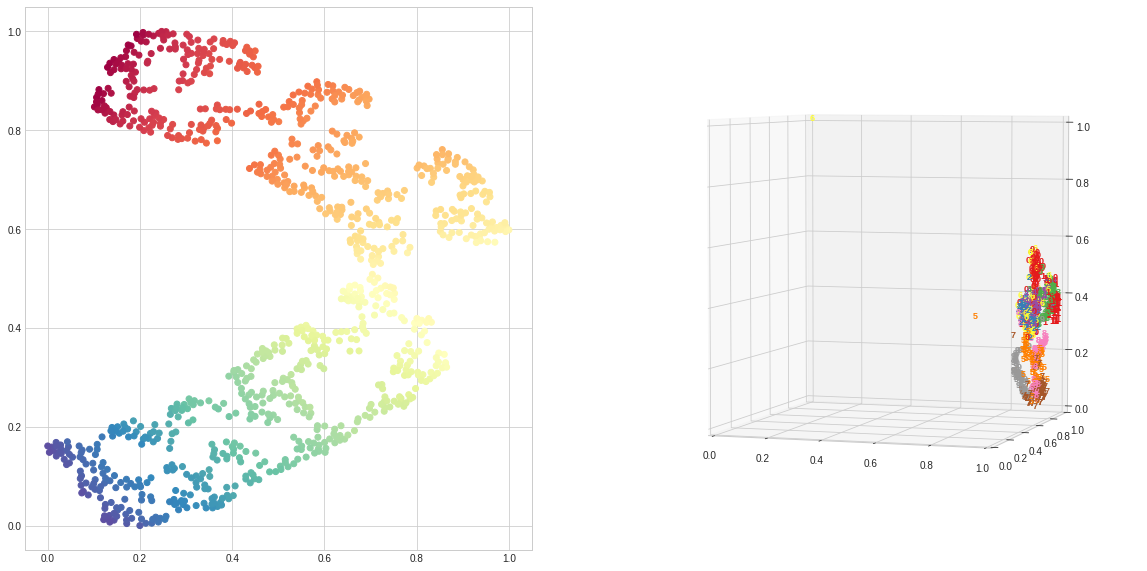

In [ ]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_tsne, color, 121, '2d')
plot_mnist(mnist_tsne, labels, 122, '3d')

## 정제된 표현을 이용한 학습
* 다양체 학습의 결과를 정제된 데이터로 생각할 수 있음
* 정제된 표현이기 때문에 분석에 비교적 용이함
* 기계학습 모델의 입력으로 사용했을때 성능향상을 기대할 수 있음

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

- 학습을 위한 데이터로 1000개 사용

In [ ]:
mnist_X_train = mnist_train.loc[0:1000,'pixel1':'pixel784']
mnist_X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,227,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,136,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,0,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,7,10,36,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,247,206,236,...,23,206,186,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,177,18,0,1,2,0,0,196,164,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,1,0,0,0,13,76,32,58,76,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,215,...,197,201,210,255,142,64,255,234,172,0,0,0,0,0,0,0,1,191,216,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,170,193,11,0,0,0
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
999,0,0,0,0,0,0,0,0,0,0,19,180,143,150,151,155,158,165,177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97,255,...,242,238,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,109,178,35,0,0,93,187,138,0,0,0,0,0,0,0,0,0


In [ ]:
mnist_y_train = mnist_train.loc[0:1000,'label']
mnist_y_train

0       2
1       9
2       6
3       0
4       3
       ..
996     1
997     4
998     7
999     1
1000    8
Name: label, Length: 1001, dtype: int64

In [ ]:
raw_mnist, target = mnist_X_train, mnist_y_train

In [ ]:
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

### 원본 데이터를 사용할 때

#### KNN

In [ ]:
score = cross_val_score(
    estimator = knn,
    X = raw_mnist, y=target,
    cv=5
)
score

array([0.73631841, 0.745     , 0.755     , 0.76      , 0.75      ])

In [ ]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.7492636815920397 (+/- 0.008178938033192836)


#### SVM

In [ ]:
score = cross_val_score(
    estimator = svm,
    X = raw_mnist, y=target,
    cv=5
)
score

array([0.75124378, 0.775     , 0.795     , 0.815     , 0.77      ])

In [ ]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.7812487562189054 (+/- 0.021882061901329963)


#### Decision Tree

In [ ]:
score = cross_val_score(
    estimator = decision_tree,
    X = raw_mnist, y=target,
    cv=5
)
score

array([0.67661692, 0.655     , 0.67      , 0.695     , 0.655     ])

In [ ]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.6703233830845772 (+/- 0.014955003755376756)


#### Random Forest

In [ ]:
score = cross_val_score(
    estimator = random_forest,
    X = raw_mnist, y=target,
    cv=5
)
score

array([0.81094527, 0.8       , 0.84      , 0.83      , 0.745     ])

In [ ]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.8051890547263681 (+/- 0.03319689012576222)


### 정제된 데이터를 사용할 때

#### KNN

In [ ]:
score = cross_val_score(
    estimator = knn,
    X = mnist_tsne, y=target,
    cv=5
)
score

array([0.74129353, 0.73      , 0.745     , 0.73      , 0.73      ])

In [ ]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.7352587064676617 (+/- 0.006546356301199689)


#### SVM

In [ ]:
score = cross_val_score(
    estimator = svm,
    X = mnist_tsne, y=target,
    cv=5
)
score

array([0.70646766, 0.705     , 0.695     , 0.725     , 0.7       ])

In [ ]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.7062935323383085 (+/- 0.0101861464871616)


#### Decision Tree

In [ ]:
score = cross_val_score(
    estimator = decision_tree,
    X = mnist_tsne, y=target,
    cv=5
)
score

array([0.65671642, 0.675     , 0.675     , 0.715     , 0.705     ])

In [ ]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.6853432835820895 (+/- 0.021444681381301862)


#### Random Forest

In [ ]:
score = cross_val_score(
    estimator = random_forest,
    X = mnist_tsne, y=target,
    cv=5
)
score

array([0.72139303, 0.695     , 0.735     , 0.745     , 0.725     ])

In [ ]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.7242786069651742 (+/- 0.016795285994670693)
